# 캘리포니아 집 값 예측
> 캘리포니아의 집 값을 예측하는 회귀 모델을 생성하자.

In [1]:
# 데이터 처리
import pandas as pd
import numpy as np

# 왜도 및 데이터의 편중을 해결하기 위해서 필요
from scipy.stats import skew

# 통계적 데이터를 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 3장 비지도 학습에서 배운 "전처리 기법"
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

## 데이터 확인

In [2]:
data = pd.read_csv("./data/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- `total_bedrooms`에 결측이 발생
- `ocean_proximity`을 전처리를 통해서 숫자로 변경

## 전처리

In [5]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: xlabel='total_bedrooms', ylabel='Count'>

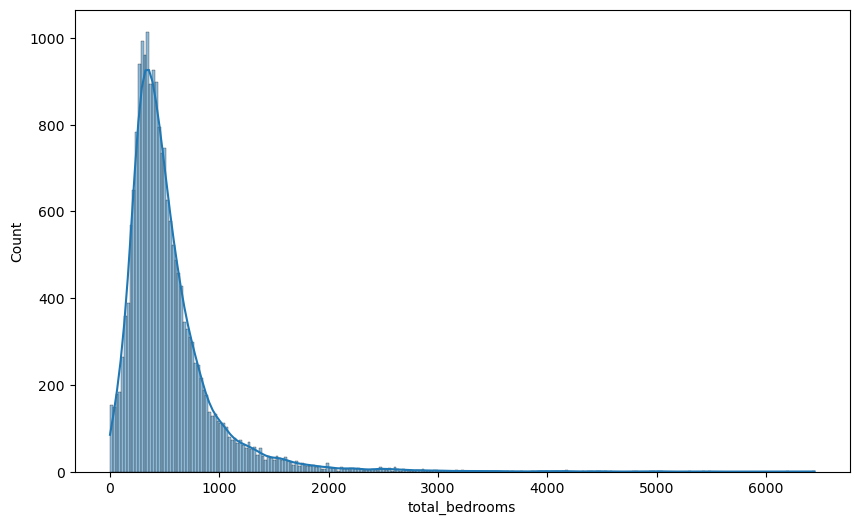

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data["total_bedrooms"], kde=True)

In [8]:
# 중위값으로 변경
data["total_bedrooms"].fillna(data["total_bedrooms"].median(), inplace=True)

In [9]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### 상관관계를 통해서 중요한 특징

<Axes: >

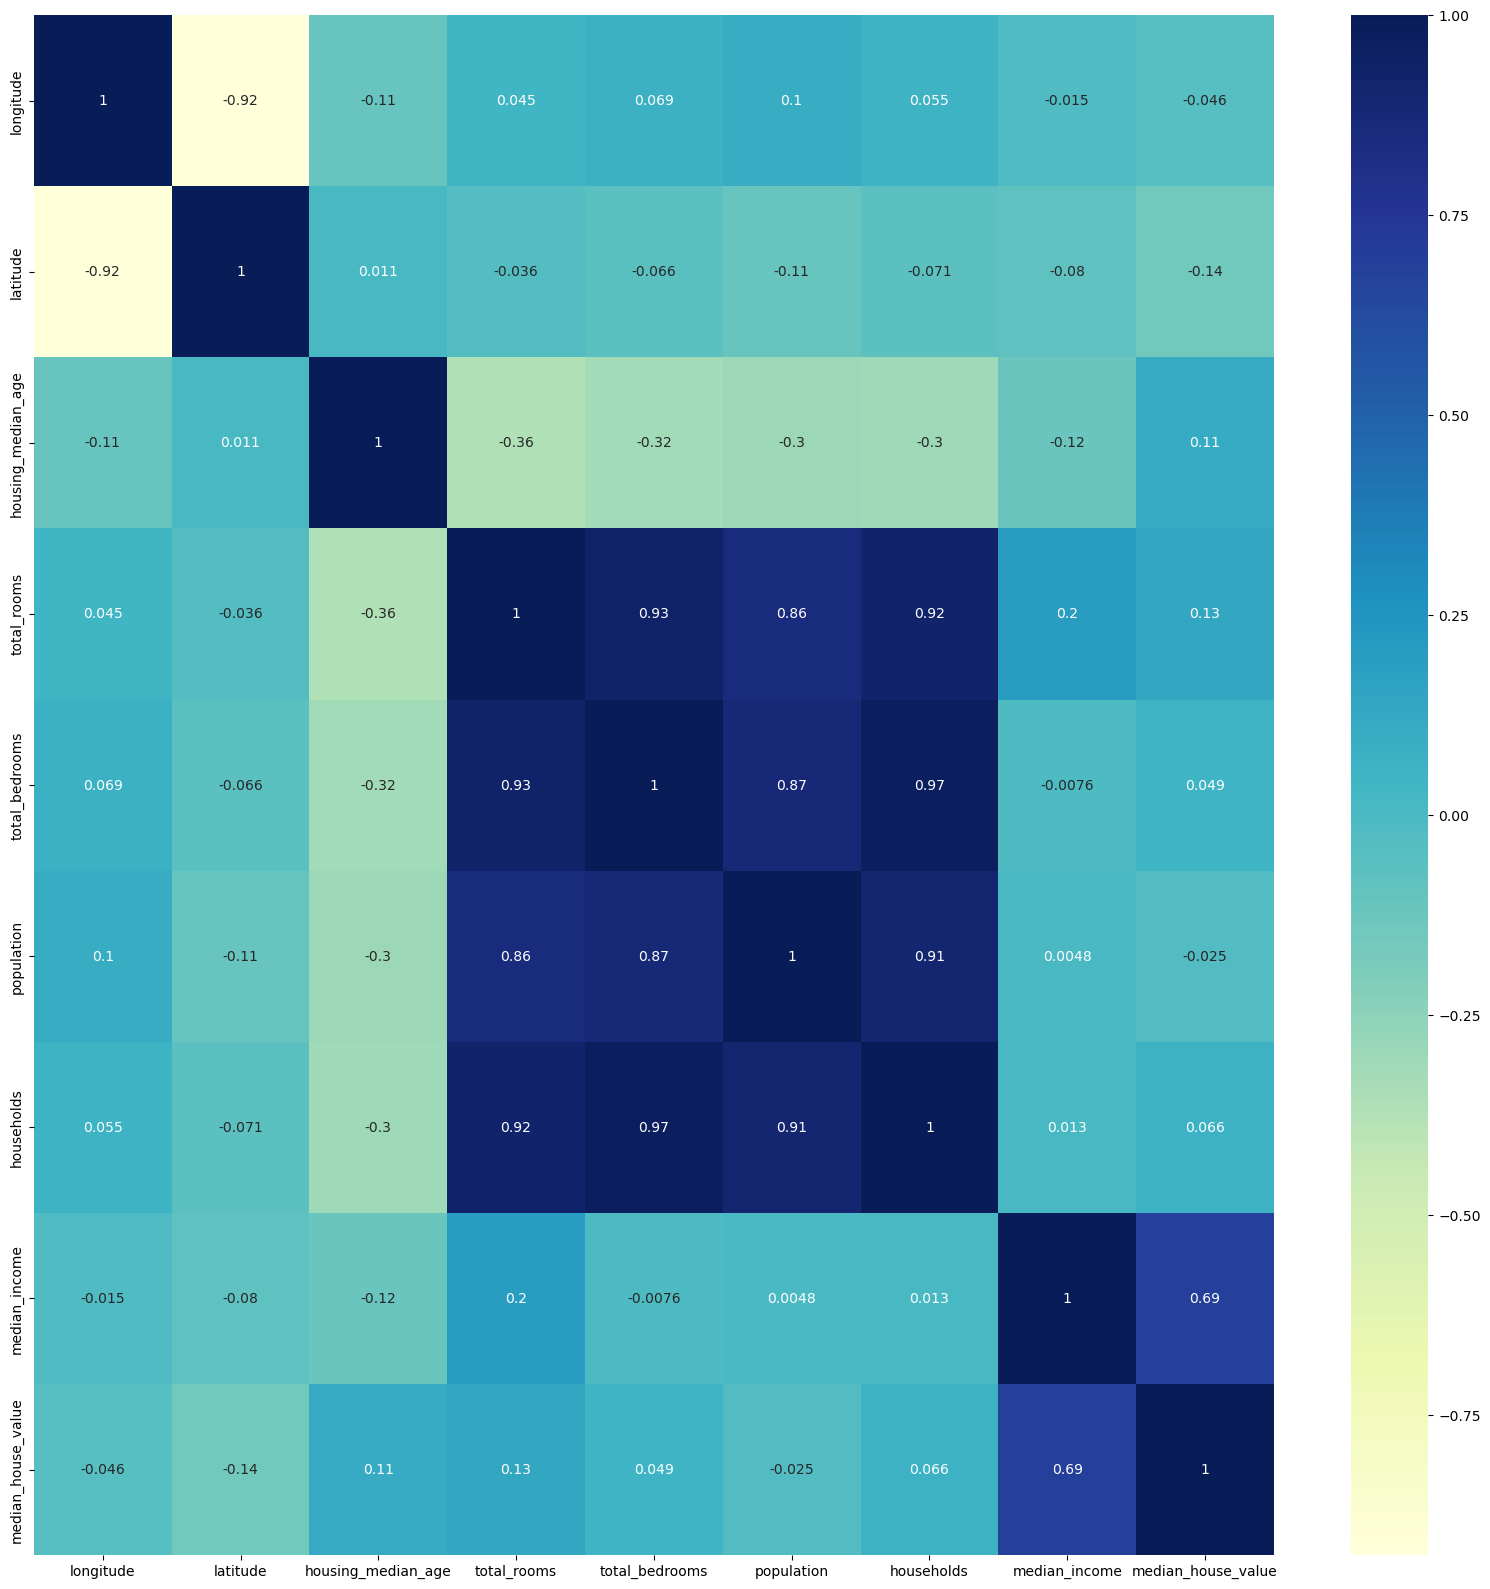

In [10]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(numeric_only=True), annot = True, cmap="YlGnBu")

<Axes: xlabel='median_house_value', ylabel='Count'>

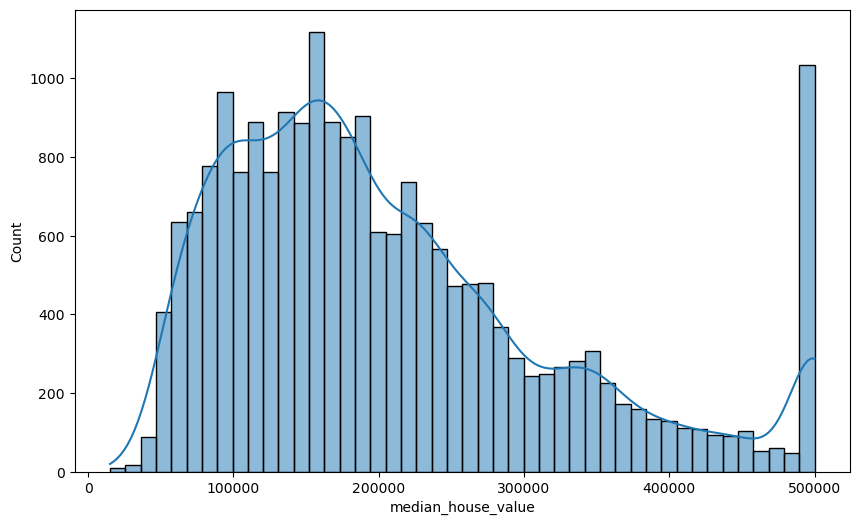

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data["median_house_value"], kde=True)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

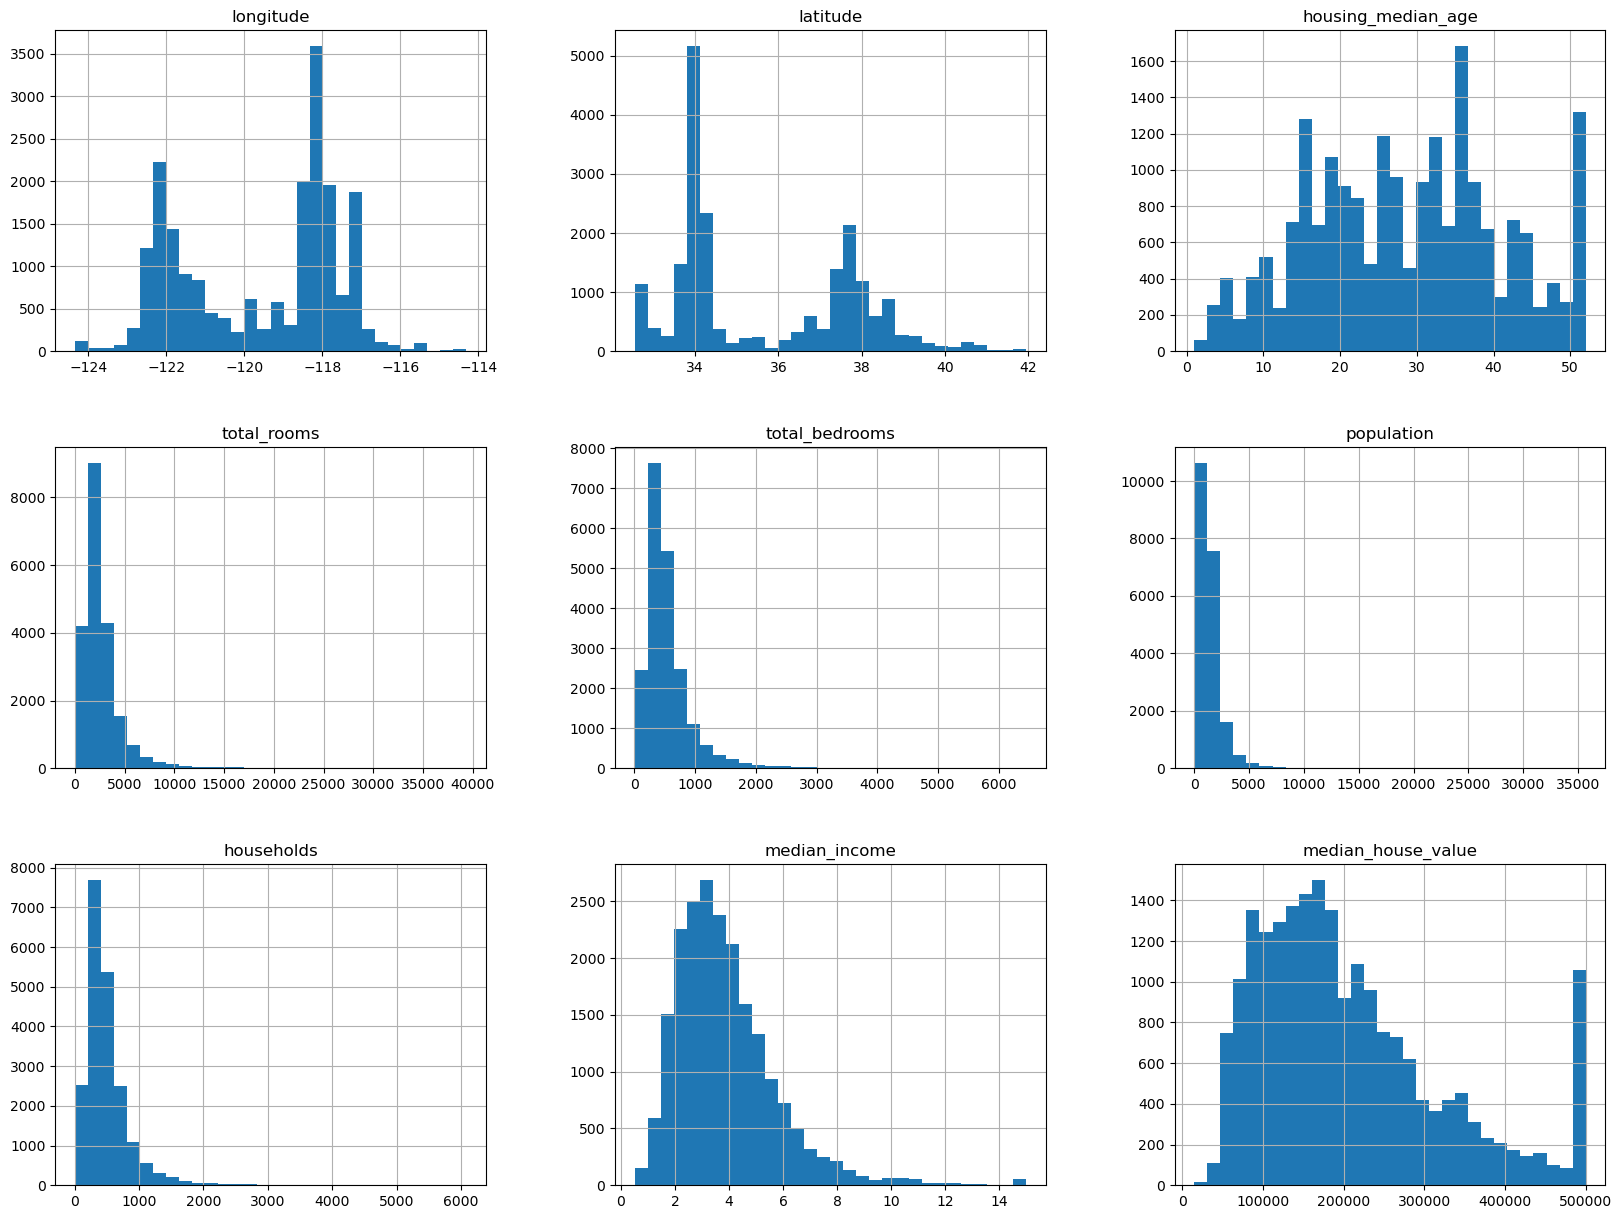

In [12]:
data.hist(bins = 30, figsize=(20,15))

- 데이터의 왜도가 심함(한 쪽으로 몰려있음)
- 집 값과 소득의 상관관계가 높음

### 범주형 데이터 확인

<Axes: xlabel='ocean_proximity', ylabel='count'>

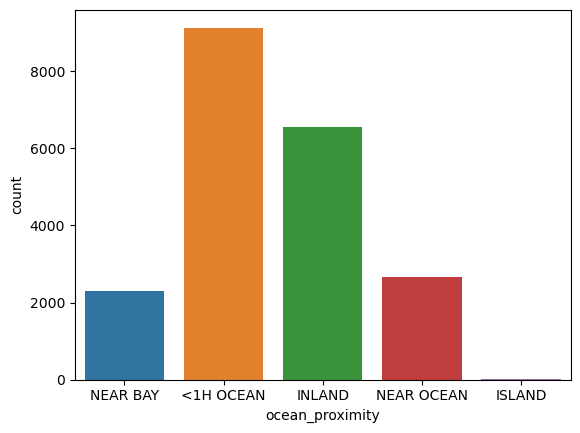

In [13]:
sns.countplot(x = data["ocean_proximity"])

### 특성공학

In [14]:
data["bed_per_room"] = data["total_bedrooms"] / data["total_rooms"]

In [15]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bed_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096


## 데이터 나누기

In [16]:
X = data.drop(["median_house_value"], axis=1)
y = np.log(data["median_house_value"])

### 데이터가 너무 왜도가 심함

In [17]:
skew_df = pd.DataFrame(X.select_dtypes(np.number).columns, columns=["Features"])
skew_df["Skew"] = skew_df["Features"].apply(lambda features: skew(X[features]))
skew_df["Abs_Skew"] = skew_df["Skew"].apply(abs)
skew_df["Skewd"] = skew_df["Abs_Skew"].apply(lambda x: True if x > 0.5 else False)

In [18]:
skew_columns = skew_df[skew_df["Abs_Skew"] > 0.5]["Features"].values
skew_columns

array(['total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'bed_per_room'], dtype=object)

In [19]:
for column in skew_columns:
    X[column] = np.log(X[column])

### 엔코딩

In [20]:
encoder = LabelEncoder()
X["ocean_proximity"] = encoder.fit_transform(X["ocean_proximity"])

In [21]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [23]:
print(X_train, X_test, y_train, y_test)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196   1.267645 -1.367976            0.346478     0.557448        0.534421   
8267    0.703627 -0.871699            1.617807     0.662187        0.846155   
17445  -0.454356 -0.455012           -1.957806    -0.107181       -0.341781   
14265   1.227714 -1.377340            0.584852    -0.491620       -0.200175   
2271   -0.114948  0.537543            1.141059     0.195762        0.020301   
...          ...       ...                 ...          ...             ...   
11284   0.803453 -0.867017            0.505394    -0.579684       -1.025942   
11964   1.067992 -0.754652            0.346478     0.539449        0.403696   
5390    0.593818 -0.749970            0.584852     0.028731        0.401287   
860    -1.193070  0.912092           -1.083767     0.736035        0.467173   
15795  -1.422670  1.001048            1.856182     0.958639        1.550273   

       population  households  median_income  ocean

## 선형 모델

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)

In [25]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_lr))
r2 = r2_score(y_test, predictions_lr)
print(rmse, r2)

0.3444308549750826 0.6344883264077854


## KNN

In [26]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_knn))
r2 = r2_score(y_test, predictions_knn)
print(rmse, r2)

0.29601285396707333 0.7300282680211424


## RandomForest

In [28]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)

In [29]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_rf))
r2 = r2_score(y_test, predictions_rf)
print(rmse, r2)

0.23333995668709287 0.8322450367160208


In [30]:
# !pip install catboost xgboost lightgbm

## CatBoost

In [31]:
from catboost import CatBoostRegressor

In [32]:
catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)
predictions_catboost = catboost.predict(X_test)

Learning rate set to 0.063766
0:	learn: 0.5477066	total: 148ms	remaining: 2m 27s
1:	learn: 0.5272182	total: 156ms	remaining: 1m 17s
2:	learn: 0.5082013	total: 163ms	remaining: 54.3s
3:	learn: 0.4912890	total: 171ms	remaining: 42.5s
4:	learn: 0.4750285	total: 177ms	remaining: 35.2s
5:	learn: 0.4605128	total: 184ms	remaining: 30.4s
6:	learn: 0.4475175	total: 191ms	remaining: 27.1s
7:	learn: 0.4353580	total: 200ms	remaining: 24.8s
8:	learn: 0.4240331	total: 207ms	remaining: 22.8s
9:	learn: 0.4146684	total: 215ms	remaining: 21.3s
10:	learn: 0.4052256	total: 223ms	remaining: 20s
11:	learn: 0.3969183	total: 230ms	remaining: 19s
12:	learn: 0.3896859	total: 237ms	remaining: 18s
13:	learn: 0.3833644	total: 245ms	remaining: 17.3s
14:	learn: 0.3761449	total: 253ms	remaining: 16.6s
15:	learn: 0.3707153	total: 259ms	remaining: 16s
16:	learn: 0.3645221	total: 266ms	remaining: 15.4s
17:	learn: 0.3598349	total: 273ms	remaining: 14.9s
18:	learn: 0.3544757	total: 280ms	remaining: 14.4s
19:	learn: 0.3504

In [33]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_catboost))
r2 = r2_score(y_test, predictions_catboost)
print(rmse, r2)

0.2205112504809162 0.8501838416230987


## XGBoost

In [34]:
from xgboost import XGBRegressor

In [35]:
xgb = RandomForestRegressor()
xgb.fit(X_train, y_train)
predictions_xgb = xgb.predict(X_test)

In [36]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_rf))
r2 = r2_score(y_test, predictions_rf)
print(rmse, r2)

0.23333995668709287 0.8322450367160208


## LightGBM

In [37]:
from lightgbm import LGBMRegressor

In [38]:
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
predictions_lgb = lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2099
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 10
[LightGBM] [Info] Start training from score 12.086494


In [39]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_lgb))
r2 = r2_score(y_test, predictions_lgb)
print(rmse, r2)

0.23141697343233006 0.8349986219828225


In [40]:
final_predictions = ( ##앙상블
    0.25 + predictions_rf +
    0.25 + predictions_catboost +
    0.25 + predictions_xgb + 
    0.25 + predictions_lgb
)

In [41]:
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
r2 = r2_score(y_test, final_predictions)
print(rmse, r2)

37.2730496465929 -4279.426144402504
